# Engine Performance Decks

In [1]:
# Add path to src/CARPy, in case notebook is running locally
import os, sys, warnings
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..\\..\\..\\src")))
warnings.simplefilter("ignore")  # <-- Suppress warnings

***
## Introduction

Selecting a suitable engine cycle is a choice that often carries significant weight (sometimes literally!) in the resultant performance of a vehicle concept during a mission.
CARPy allows users to simulate the performance decks of several families and models of engines:

1. BasicTurbo, a collection of non-dimensional turbomachines including turbofans, turbojets, and turboprops.
1. BasicMattingly, a collection of non-dimensional turbomachines including turbofans, turbojets, and turboprops.
1. BasicPiston, a collection of non-dimensional reciprocating engines.
1. BasicElectric, a collection of non-dimensional electric engines.

***
## 1) `BasicTurbo` objects

The `BasicTurbo` object is a catalogue of representative turbomachines for a variety of conventional engine cycles, including:

1. HiBPR, for high-bypass ratio (BPR $\gg$ 1) engines that you'd usually find in pod-style nacelles.
2. LoBPRmixed, for low-bypass ratio (BPR $\sim$1) engines that you'd usually find embedded within the fuselage of military fighter aircraft.
3. LoBPRmixedAB, similar to LoBPRmixed but with afterburner (reheat) engaged.
4. Turbojet, for turbojet engines.
5. TurbojetAB, for turbojet engines with afterburner (reheat) engaged.

In [2]:
from carpy.propulsion import BasicTurbo

# Collect the names of the classes in the BasicTurbo catalogue
turbomachines = [attribute for attribute in dir(BasicTurbo) if not attribute.startswith("_")]
print(turbomachines)

['TurbofanHiBPR', 'TurbofanLoBPRmixed', 'TurbofanLoBPRmixedAB', 'Turbojet', 'TurbojetAB', 'Turboprop']


Let's peek into the decks and compare their relative performance:

Computing deck 6/6: Done!                                  


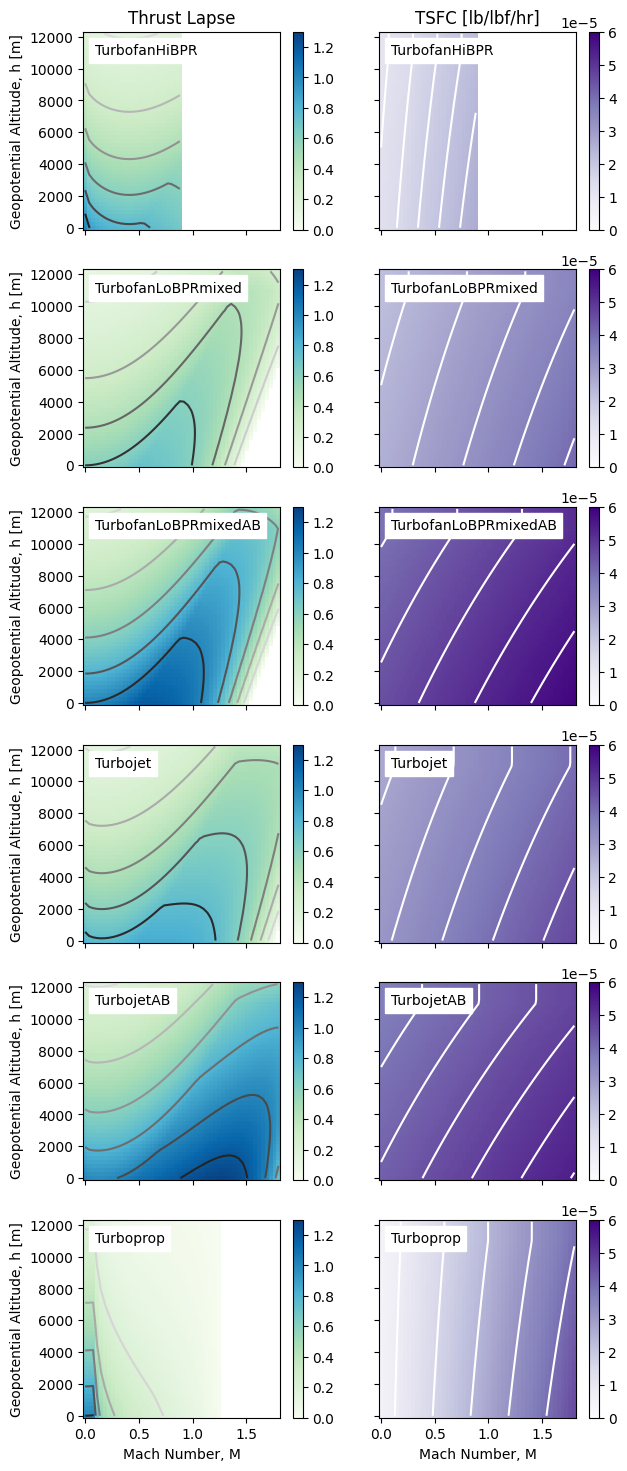

In [3]:
from carpy.utility import Quantity
from matplotlib import pyplot as plt
import numpy as np


# Define independent data
Machs = np.linspace(0, 1.8)
altitudes = Quantity(np.linspace(0, 40e3), "ft")
mesh_M, mesh_h = np.meshgrid(Machs, altitudes)

# Spawn a figure
figrows = len(turbomachines)
fig, axs = plt.subplots(figrows, 2, figsize=(7, 3 * figrows), sharex=True, sharey=True)

# Iterate over the defined turbomachine class names
for i, classname in enumerate(turbomachines):
    
    print(f"\rComputing deck {i+1}/{figrows}: {classname}...", end=" "*16)
    
    # Instantiate relevant engine deck and compute dependent values
    enginedeck = getattr(BasicTurbo, classname)()
    Tlapse = enginedeck.Tlapse(mesh_M, mesh_h)
    TSFC = enginedeck.TSFC(mesh_M, mesh_h)
    
    # Plot data
    cm0 = axs[i][0].pcolormesh(mesh_M, mesh_h, Tlapse, vmin=0, vmax=1.3, cmap="GnBu")
    cs0 = axs[i][0].contour(mesh_M, mesh_h, Tlapse, cmap="binary", levels=5)
    cm1 = axs[i][1].pcolormesh(mesh_M, mesh_h, TSFC, vmin=0, vmax=6e-5, cmap="Purples")
    cs1 = axs[i][1].contour(mesh_M, mesh_h, TSFC, colors="white", levels=5)
    
    fig.colorbar(cm0, ax=axs[i][0])
    fig.colorbar(cm1, ax=axs[i][1])
    
    xtext, ytext = 0.05 * Machs.max(), 0.95 * altitudes.max()
    axs[i][0].text(xtext, ytext, classname, backgroundcolor="white", va="top")
    axs[i][1].text(xtext, ytext, classname, backgroundcolor="white", va="top")
    axs[i][0].set_ylabel("Geopotential Altitude, h [m]")

else:
    print(f"\rComputing deck {i+1}/{figrows}: Done!"+" "*20)
    
    axs[0][0].set_title("Thrust Lapse")
    axs[0][1].set_title("TSFC [lb/lbf/hr]")
    axs[i][0].set_xlabel("Mach Number, M")
    axs[i][1].set_xlabel("Mach Number, M")

plt.show()

Each graph's color bar has been scaled to the same range, and the purpose of contours is to qualitatively indicate the surface gradient.
Afterburning, low-bypass cycles appear the most fuel intensive, with unducted fan/high bypass designs presenting more economical options.
Low-bypass cycles tend to retain the most performance over the widest range of flight conditions.

***
## 2) `BasicMattingly` objects

Many of the decks in the `BasicTurbo` section are actually from Mattingly.
The list of Mattingly-derived decks is as follows:

In [11]:
from carpy.propulsion import BasicMattingly

# Collect the names of the classes in the BasicTurbo catalogue
Mdecks = [attribute for attribute in dir(BasicMattingly) if not attribute.startswith("_")]
print(Mdecks)

['TurbofanHiBPR', 'TurbofanLoBPRmixed', 'TurbofanLoBPRmixedAB', 'Turbojet', 'TurbojetAB', 'Turboprop']


***
## 3) `BasicPiston` objects

The `BasicPiston` object is a catalogue containing various performance lapse methods for piston engines, including:

1. PistonGaggFarrar, a power lapse method based on the Gagg-Farrar model.
1. PistonNACA925, a power lapse method based on findings of NACA report No. 925.

In [4]:
from carpy.propulsion import BasicPiston

# Collect the names of the classes in the BasicPiston catalogue
pistonengines = [attribute for attribute in dir(BasicPiston) if not attribute.startswith("_")]
print(pistonengines)

['PistonGaggFarrar', 'PistonNACA925']


Computing deck 2/6: Done!                              


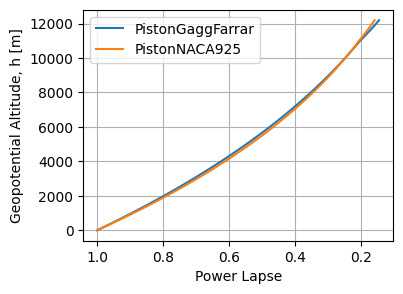

In [5]:
# Define independent data
Machs = np.linspace(0, 1.8)
altitudes = Quantity(np.linspace(0, 40e3), "ft")

fig, ax = plt.subplots(1, 1, figsize=(4, 3), sharex=True, sharey=True)

# Iterate over the defined piston engine class names
for i, classname in enumerate(pistonengines):
    
    print(f"\rComputing deck {i+1}/{figrows}: {classname}...", end=" "*16)
    
    # Instantiate relevant engine deck and compute dependent values
    enginedeck = getattr(BasicPiston, classname)()
    Plapse = enginedeck.Plapse(Machs, altitudes)
    
    ax.plot(Plapse, altitudes, label=classname)
else:
    print(f"\rComputing deck {i+1}/{figrows}: Done!"+" "*20)
    
    ax.set_xlim(ax.get_xlim()[::-1])
    
    ax.set_xlabel("Power Lapse")
    ax.set_ylabel("Geopotential Altitude, h [m]")
    ax.grid()
    ax.legend()

plt.show()

***
## 4) `BasicElectric` objects

In [6]:
from carpy.propulsion import BasicElectric

In [9]:
BasicElectric.ElectricMotor.BSFC

<function carpy.propulsion._enginedecks_ansatz.EngineDeck.BSFC(self, Mach: Union[tuple, list, numpy.ndarray, int, float, numpy.integer, numpy.inexact], altitude: Union[tuple, list, numpy.ndarray, int, float, numpy.integer, numpy.inexact] = None, geometric: bool = None, atmosphere: object = None) -> carpy.utility._unitconversion.Quantity>